In [73]:
import numpy as np
import pandas as pd


In [74]:
df = pd.read_csv("/content/placement-dataset.csv")

In [75]:
df

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0
...,...,...,...,...
95,Chicago,4.3,200.0,0
96,New York,4.4,42.0,0
97,Los Angeles,6.7,182.0,1
98,Chicago,6.3,103.0,1


In [76]:
df.shape

(100, 4)

In [77]:
df.head()

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0


In [78]:
df = df.iloc[:,1:]

In [79]:
df.head()


,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,NaN,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [80]:
print("Null values in the DataFrame:")
print(df[['cgpa', 'iq', 'placement']].isnull().sum())


Null values in the DataFrame:
cgpa         8
iq           4
placement    0
dtype: int64


In [82]:
df = df.dropna(subset=['cgpa'])

In [83]:
df = df.dropna(subset=['iq'])

In [84]:
print("Null values in the DataFrame:")
print(df[['cgpa', 'iq', 'placement']].isnull().sum())

Null values in the DataFrame:
cgpa         0
iq           0
placement    0
dtype: int64


In [85]:
import matplotlib.pyplot as plt


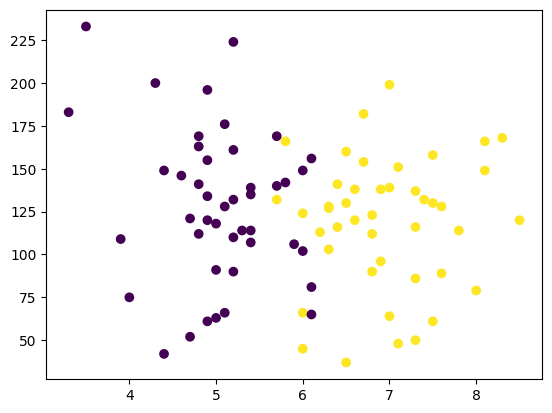

In [86]:
plt.scatter(df['cgpa'] , df['iq'] ,c = df['placement'])

In [87]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [88]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
3,7.4,132.0
4,5.8,142.0
5,7.1,48.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [89]:
y

,placement
0,1
1,0
3,1
4,0
5,1
...,...
95,0
96,0
97,1
98,1


In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X , y , test_size=0.1)

In [46]:
y_train

,placement
77,1
53,1
6,0
11,1
68,0
...,...
45,1
81,0
95,0
82,1


In [91]:
x_test

,cgpa,iq
66,6.9,96.0
97,6.7,182.0
17,3.3,183.0
8,6.1,156.0
44,7.5,61.0
65,8.1,166.0
42,7.6,89.0
93,6.8,112.0
62,6.0,102.0


In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scalar = StandardScaler()

In [94]:
x_train = scalar.fit_transform(x_train)

In [95]:
x_train

array([[ 0.94619353, -1.43419961],
       [ 0.05526041, -1.38558267],
       [ 1.39166009,  0.85079638],
       [-2.1720724 ,  2.67393147],
       [ 0.85710022,  0.36462702],
       [ 0.14435372, -1.02095565],
       [-0.7465794 ,  0.12154234],
       [-0.92476603, -1.50712501],
       [-1.10295265, -0.04861694],
       [ 1.21347347, -0.17015928],
       [ 1.65894003, -0.21877621],
       [-1.01385934,  1.11818952],
       [ 1.30256678,  0.21877621],
       [ 0.23344703, -0.24308468],
       [-0.47929946, -0.21877621],
       [ 1.83712665, -1.06957259],
       [-1.37023259, -1.9689859 ],
       [ 1.03528684, -1.82313509],
       [-0.12292622,  0.46186089],
       [ 0.05526041,  0.63202017],
       [ 0.50072697,  0.89941331],
       [ 0.41163366,  0.43755242],
       [ 2.10440659,  1.09388106],
       [-0.92476603,  1.77451816],
       [-0.12292622,  1.04526412],
       [-1.81569915, -0.34031855],
       [-1.10295265, -1.72590122],
       [-0.47929946,  0.29170161],
       [ 0.94619353,

In [97]:
x_test = scalar.transform(x_test)

In [96]:
x_test

,cgpa,iq
66,6.9,96.0
97,6.7,182.0
17,3.3,183.0
8,6.1,156.0
44,7.5,61.0
65,8.1,166.0
42,7.6,89.0
93,6.8,112.0
62,6.0,102.0


In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
cf = LogisticRegression()

In [100]:
cf.fit(x_train , y_train)

LogisticRegression()

In [104]:
y_pred=cf.predict(x_test)

In [105]:
y_test

,placement
66,1
97,1
17,0
8,0
44,1
65,1
42,1
93,1
62,0


In [106]:
from sklearn.metrics import accuracy_score

In [107]:
accuracy_score(y_test , y_pred)

0.7777777777777778

In [112]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

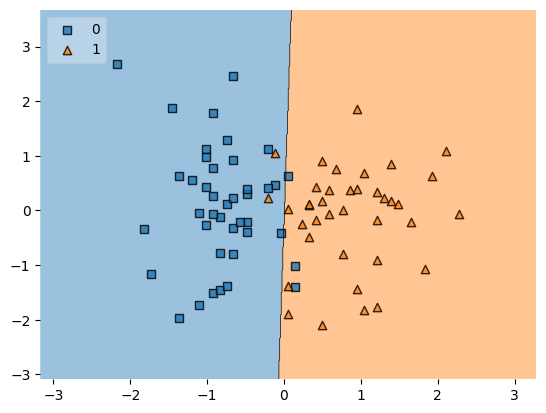

In [114]:
plot_decision_regions(x_train, y_train.values, clf=cf, legend=2)

# Optional: Add labels and title to the plot

In [115]:
import pickle

In [116]:
pickle.dump(cf , open('model.pkl' , 'wb'))